# Return to schooling in the EU

Imports and set magics:

In [1]:
# Import relevant packages
import warnings
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from DataProject import *
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Loading and preparing data

We have chosen two datasets. The first one is a dataset that shows the return to schooling for 150 countries. We limit the analysis to all EU countries as they all have the return to schooling reported in the same year, 2019. The second dataset show government expenditures and GDP from 1980 to 2022. 

The return to schooling dataset comes from the paper "Distributional Growth Accounting: Education and the Reduction of Global Poverty, 1980-2022" by Amory Gethin in which return to schooling is defined as the aggregate effect on output from an additional year of schooling.

From the chosen data we aim to analyze the differences in return to an additional year of schooling between the EU countries with a focus on Denmark. We also analyze the the differences between return to schooling for men and women as well as the covariation between return to schooling and average government expenditures in education per capita from 1980-2019 as well as GDP per capita in 2019.

In [2]:
# The two datasets are loaded
return_to_schooling = 'Data_Return_To_Schooling.dta' ; rts = pd.read_stata(return_to_schooling)
government_expenditure = 'Data_Government_Expenditures.dta' ; gexp = pd.read_stata(government_expenditure)

We start by prepping the two datasets and then merging them into a single dataset.

In [8]:
# 1. Remove non-european countries from both dataset
rts_eu = european(rts)
gexp_eu = european(gexp)

# 2. Process the dataset for return to schooling
warnings.simplefilter('ignore') # Some warnings that doesn't impede the results have been removed
rts_eu_sorted = data_clean_rts(rts_eu)

# 3. Process the data set for government expenditures
gexp_eu_2019 = data_clean_gexp(gexp_eu)

# 4. Merge the two datasets
gexp_rts_eu = grand_merge(rts_eu_sorted,gexp_eu_2019)

# The full datasets can be shown
gexp_rts_eu.head(27)

,country,iso,return_to_schooling,lower_rts,upper_rts,rts_women,lower_rts_women,upper_rts_women,rts_men,lower_rts_men,upper_rts_men,year,npop,gdp_cap_t,gova_educ_cap_t,avg_gov_educ_exp,avg_gov_educ_exp_log,gdp_cap_t_log
0,Portugal,PT,8.537110,8.424878,8.649342,9.306932,9.146111,9.467753,7.739199,7.585140,7.893258,2019.0,10289923.0,20.833436,0.931008,0.614089,-0.487615,3.036559
1,Italy,IT,8.810863,8.368219,9.253508,9.725856,9.056469,10.395243,8.054729,7.464427,8.645030,2019.0,60195780.0,28.606045,1.164085,0.833057,-0.182653,3.353618
2,Greece,GR,8.811475,8.154680,9.468268,10.907956,9.625652,12.190261,7.616029,6.913229,8.318830,2019.0,10623177.0,17.259550,0.688495,0.445593,-0.808349,2.848366
3,France,FR,9.763430,9.557838,9.969022,10.602239,10.256433,10.948046,9.058083,8.810096,9.306069,2019.0,66442484.0,35.538907,1.925365,1.266684,0.236403,3.570628
4,Luxembourg,LU,10.301188,9.501303,11.101073,11.779902,10.331982,13.227822,9.256530,8.374347,10.138714,2019.0,619973.0,100.606885,4.840533,2.438110,0.891223,4.611221
5,Spain,ES,10.857859,10.303720,11.411999,12.712818,11.850718,13.574919,9.586326,8.868175,10.304476,2019.0,47039080.0,26.228499,1.064094,0.604815,-0.502832,3.266847
6,Poland,PL,11.047719,10.364385,11.731054,12.829378,11.711324,13.947433,9.657219,8.836878,10.477562,2019.0,38493600.0,59.451212,2.984444,1.108242,0.102775,4.085156
7,Slovakia,SK,11.494584,10.150826,12.838343,11.778298,10.000385,13.556212,11.245753,9.259441,13.232066,2019.0,5453924.0,17.315480,0.734700,0.338875,-1.082125,2.851601
8,Czechia,CZ,11.759451,10.867955,12.650948,11.342204,10.016757,12.667651,12.134659,10.931787,13.337530,2019.0,10544486.0,549.244720,26.671854,14.369039,2.665076,6.308544
9,Malta,MT,11.868278,10.896626,12.839927,12.874414,11.335876,14.412950,11.256679,10.000181,12.513176,2019.0,503635.0,27.892995,1.413722,0.582433,-0.540542,3.328376


# Analyzing data: Summary statistics

To begin the data analisys we provide an overview of summary statistics for all variables excluding confidence bounds.

In [4]:
gexp_rts_eu.loc[:,['return_to_schooling','rts_women','rts_men','gdp_cap_t','gdp_cap_t_log','avg_gov_educ_exp','avg_gov_educ_exp_log']].describe()

,return_to_schooling,rts_women,rts_men,gdp_cap_t,gdp_cap_t_log,avg_gov_educ_exp,avg_gov_educ_exp_log
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,13.536271,14.733476,12.595617,262.359612,3.983917,5.696519,0.284197
std,3.141095,3.406411,3.213032,906.022912,1.341111,16.280856,1.398334
min,8.537110,9.306932,7.616029,16.007195,2.773038,0.182783,-1.699455
25%,11.271152,12.246360,10.228130,21.946101,3.087500,0.578706,-0.546981
50%,13.874195,14.201361,12.675545,39.791003,3.683641,1.050736,0.049491
75%,15.366138,16.665274,14.681035,66.153635,4.186821,1.520662,0.418810
max,20.104675,22.646791,21.189346,4737.364077,8.463236,83.462583,4.424398


From the summary statistics we see that the mean return to schooling is 13.53 pct. in 2019 with values that vary between 8.54 and 20.1 pct. In general the average return to schooling is higher for women at 14.73 pct. than for men at 12.59 pct. Return to schooling is also seen to be close to symmetric as median and average values are close.

The GDP per capita average is 262.35 thousand dollars with a very large standard deviation of 906.02 thousand dollars. It is seen that the variable is largely right skewed we therefore make the log transformation to get a more symmetrically distributed variable.

The average government expenditures in education per capita is 5.69 thousand dollars again with a large standard deviation and right skewness such that logs are taken.

# Analyzing data: Comparing return to schooling between countries

To compare return to schooling between the EU countries we plot a bar chart in ascending order. Denmark has been highlighted.

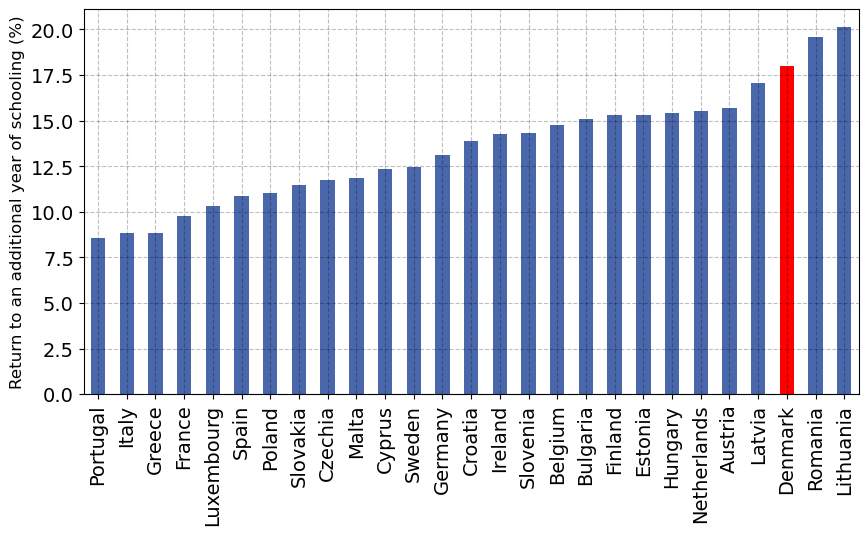

In [5]:
plot_country_comp(gexp_rts_eu)

From the chart we see that the country with the smallest return to schooling is Portugal while the one with the largest return is Lithuania. From the chart it is evident that Denmark is the country with the third largest return to schooling.

# Analyzing data: Return schooling differences for men and women

To compare return to schooling between men and women we make a scatterplot with a 45 degree line, such that any countries above the 45 degree line has a larger return to schooling for women than men.

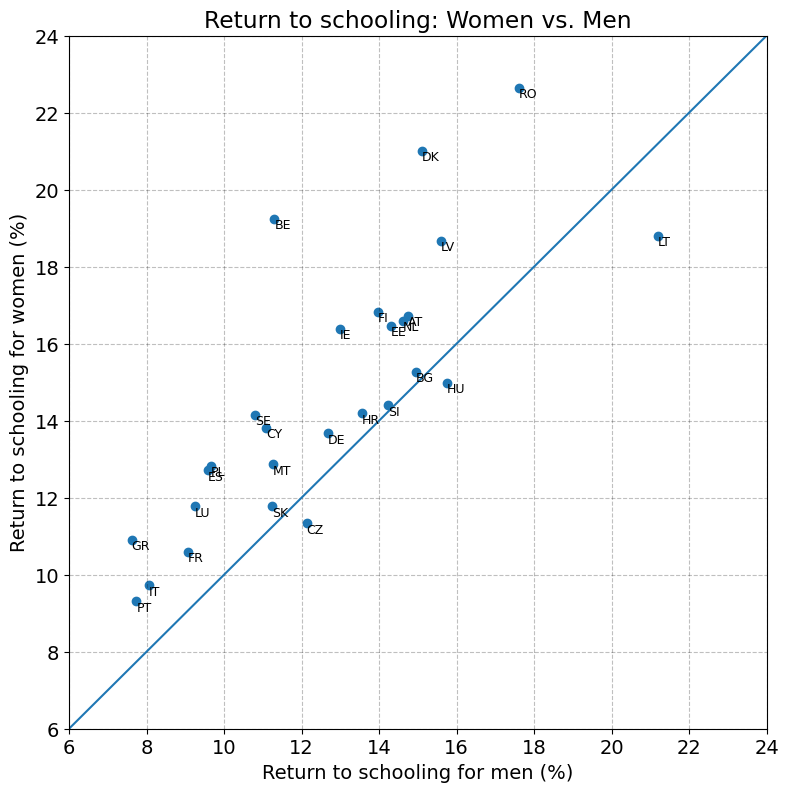

In [6]:
plot_women_men(gexp_rts_eu)

From the plot we see that only Hungary, Lithunia and Czechia has a larger return to schooling for men than women while every other country has the opposite. We also see that Denmark places quite high up the table such that the return to schooling for women is quite large compared for men.

# Analyzing data: Covariation btw. return to schooling and expenditures / GDP

To analyze the covariation between government expenditures in education per capita and return to schooling we make a scatter plot with a linear fit. In this way we may see if the covariation is positive or negative. The same is done for GDP per capita.

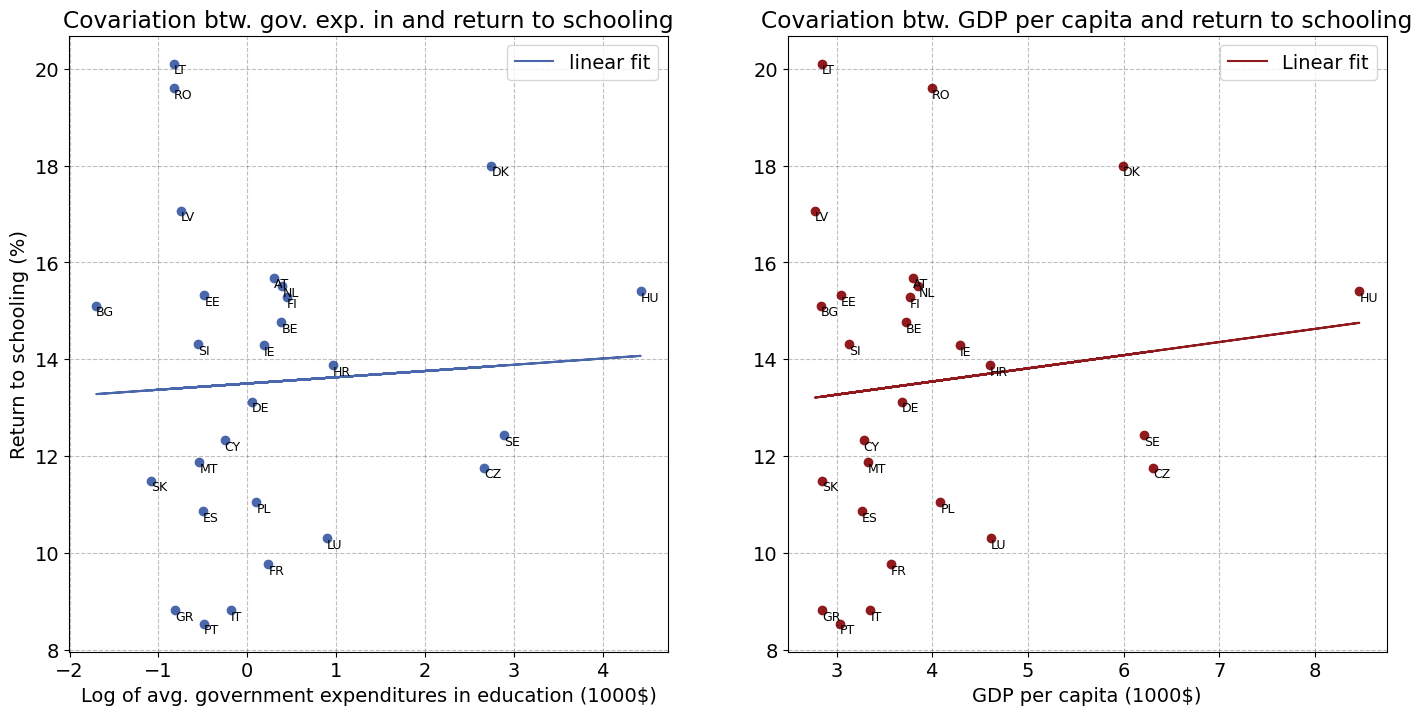

In [7]:
plot_covariation(gexp_rts_eu)

From the two figures we notice that countries with larger GDP per capita usually spends more on education, and that there is a positive covariation between wealth and expenditures in education to the return to schooling. The covariation however isn't very large as seen from the linear fit. In both figures wee that Denmark places in the top left right corner with high return to schooling and large government expenditures in schooling per capita as well as GDP per capita. 

One thing to notice is that the countries with the highest return to schooling, namely Lithuania and Romania are placed among the poorer countries with smaller expenditures in education.

# Conclusion

To conclude we have shown that Denmark is among the countries in the EU with highest return to schooling. We have also shown that in general womens return to schooling is larger than that of the men. Lastly we have shown that there is an overall positive correlation between government expenditures in education per capita as well as GDP per capita and return to schooling. However this correlation is a bit muddy as some of the countries with highest return to schooling are among the poorest.